# Information Effects on the Bid - Ask Spread
**Presenta:** Alexander Sotomayor, Iñigo De Obeso

## 1. ¿Qué es un Market Maker?
Tal como se indagó en clase, un Market Maker, o creador de mercado, establece precios de compra $(bid,K_B)$ y de venta $(ask,K_A)$ con el objetivo de generar una ganancia a través de un spread, o comisión por transacción.  

Dicha institución se enfrenta a dos tipos de traders:
1. **Traders de liquidez:**  no tienen información privilegiadas y solo buscan salir o entrar de posiciones de manera rápida.
2. **Traders informados:**  contienen información sobre el valor futuro de un activo y operan solo cuando pueden obtener una ganancia contra el market maker.

Dados esto, el market maker busca balancear los ingresos que recibe de los traders de liquidez con las pérdidas de los informados ajustando los precios $K_B, K_A$ para que limitar las pérdidas potenciales y retener a su clientela.

## 2. Relaciones del Bid - Ask Spread
En su artículo, Copeland y Galai hacen referencia a los factores que impactan en el spread de un market maker:
1. **Volatilidad del activo ($\sigma$):** donde a mayor volaitlidad, mayor es el spread (relación positiva).
2. **Precio del activo ($S_0$):** A precios más altos, el spread tiende a ser mayor.
3. **Competencia entre market makers:** A mayor competencia, el spread se reduce.
4. **Frecuencia de transacciones:** Más transacciones reducen el spread.
5. **Proporción de traders informados ($p_I$):** Más traders informados aumentan el spread.

## 3. Modelando el Spread
De manera general el spread the un market maker se puede visualizar asi:
$$ \Pi(K_A, K_B) = \mathbb{E}[\text{Ingresos}] - \mathbb{E}[\text{Pérdidas}] $$  

Los ingresos esperados por traders de liquidez modelandose con la fórmula:
$$\mathbb{E}[\text{Ingresos}] = (1 - p_I) \left[ P_{BL} (K_A - S_0) + P_{SL} (S_0 - K_B) \right]$$  

Y las pérdidas por traders informados con:
$$\mathbb{E}[\text{Pérdidas}] = p_I \left[ \int_{K_A}^{\infty} (S - K_A) f(S) dS + \int_{-\infty}^{K_B} (K_B - S) f(S) dS \right]$$  

El **market maker** ajusta $K_A$ y $K_B$ para maximizar su beneficio.

## 4. Punto óptimo para el Bid y Ask
Las condiciones óptimas se obtienen resolviendo:
1. **Para $K_A$ (Ask Price)**:

$$\frac{\partial \Pi}{\partial K_A} = (1 - p_I) P_{BL} - p_I \int_{K_A}^{\infty} f(S) dS = 0$$
* El market maker aumenta $K_A$ hasta que el ingreso marginal por traders de liquidez compense la pérdida marginal por traders informados.  
2. **Para $K_B$ (Bid Price)**:

$$\frac{\partial \Pi}{\partial K_B} = (1 - p_I) P_{SL} - p_I \int_{-\infty}^{K_B} f(S) dS = 0$$
* El market maker reduce $K_B$ hasta que la pérdida marginal por traders informados compense el ingreso marginal de traders de liquidez.

## 5. Opciones para el Modelaje del Spread
El spread puede interpretarse como una combinación de opciones financieras:
$$p_I \left[ C(K_A) + P(K_B) \right]$$
donde:
* $C(K_A)$ es el valor de una opción call con strike $K_A$.
* $P(K_B)$ es el valor de una opción put con strike $K_B$.  
Usando Black Scholes:
$$C(K_A) = S_0 N(d_1) - K_A N(d_2)$$
$$P(K_B) = K_B N(-d_2) - S_0 N(-d_1)$$
donde:
$$d_1 = \frac{\ln(S_0 / K_A) + \frac{1}{2} \sigma^2 T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}$$
El market maker ajusta $K_A, K_B$ hasta que los ingresos por liquidez igualen las pérdidas esperadas por información privilegiada.

## 6. Visualización de Curvas de Rendimiento: Copeland y Galai

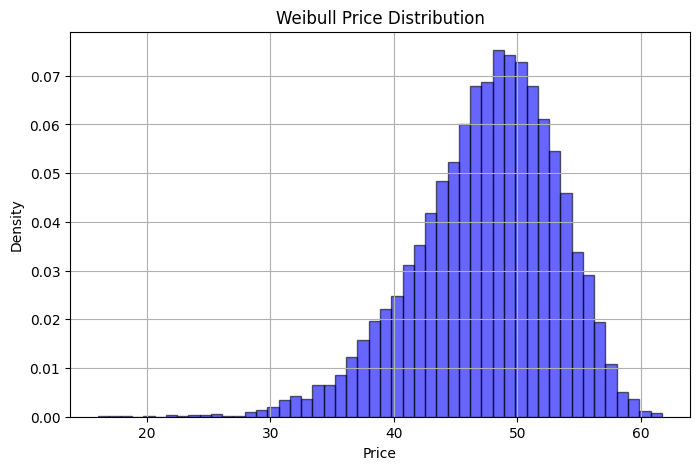

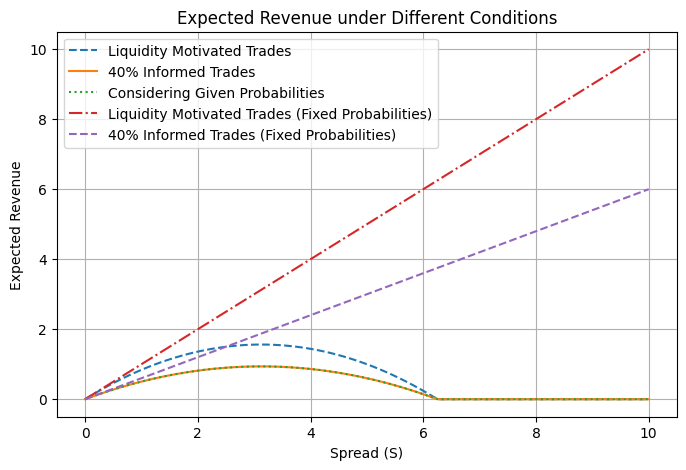

Optimal Bid: 50.53, Optimal Ask: 51.47


In [1]:
from market_maker import MarketMaker, plot_price_distribution, plot_expected_revenue

market_maker = MarketMaker()
    
plot_price_distribution(market_maker)

plot_expected_revenue(market_maker)

optimal_bid, optimal_ask = market_maker.compute_optimal_bid_ask()
print(f"Optimal Bid: {optimal_bid:.2f}, Optimal Ask: {optimal_ask:.2f}")